In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [6]:
data = pd.read_csv('./AB_NYC_2019 (1).csv'); data

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

1. Vẽ biểu đồ cột cho neighborhood group

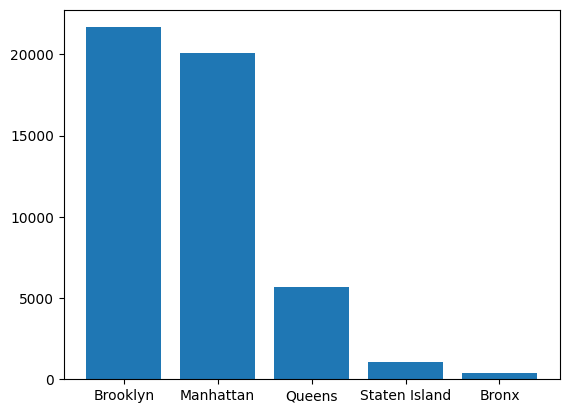

In [31]:
#Lấy các thuộc tính đặc trưng
neighbourhood_group_unique = data['neighbourhood_group'].unique()
#Lấy số lượng của các giá trị đặc trưng
neighbourhood_group_amount = data['neighbourhood_group'].value_counts()

plt.bar(neighbourhood_group_unique, neighbourhood_group_amount)
plt.show()



2. Tạo histogram cho neighborhood

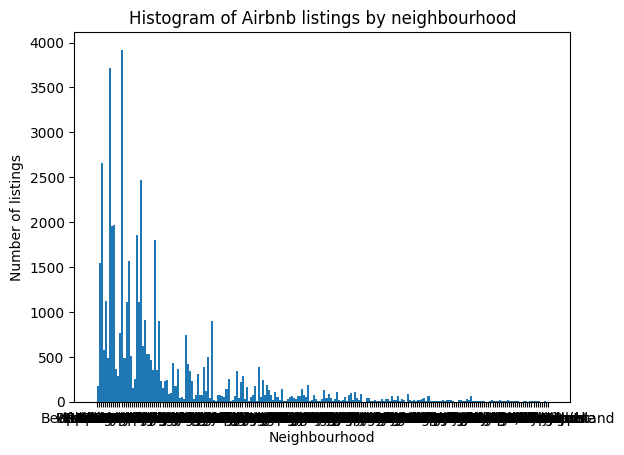

In [38]:
#Lấy các thuộc tính đặc trưng
neighbourhood_unique = data['neighbourhood'].unique()

fig, ax = plt.subplots()
ax.hist(data['neighbourhood'], bins=neighbourhood_unique.size)

# đặt tiêu đề và tên trục
ax.set_title('Histogram of neighbourhood')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of listings')

# hiển thị biểu đồ
plt.show()

3. Biểu diễn mối liên hệ giữa neighborhood và Availability của các phòng

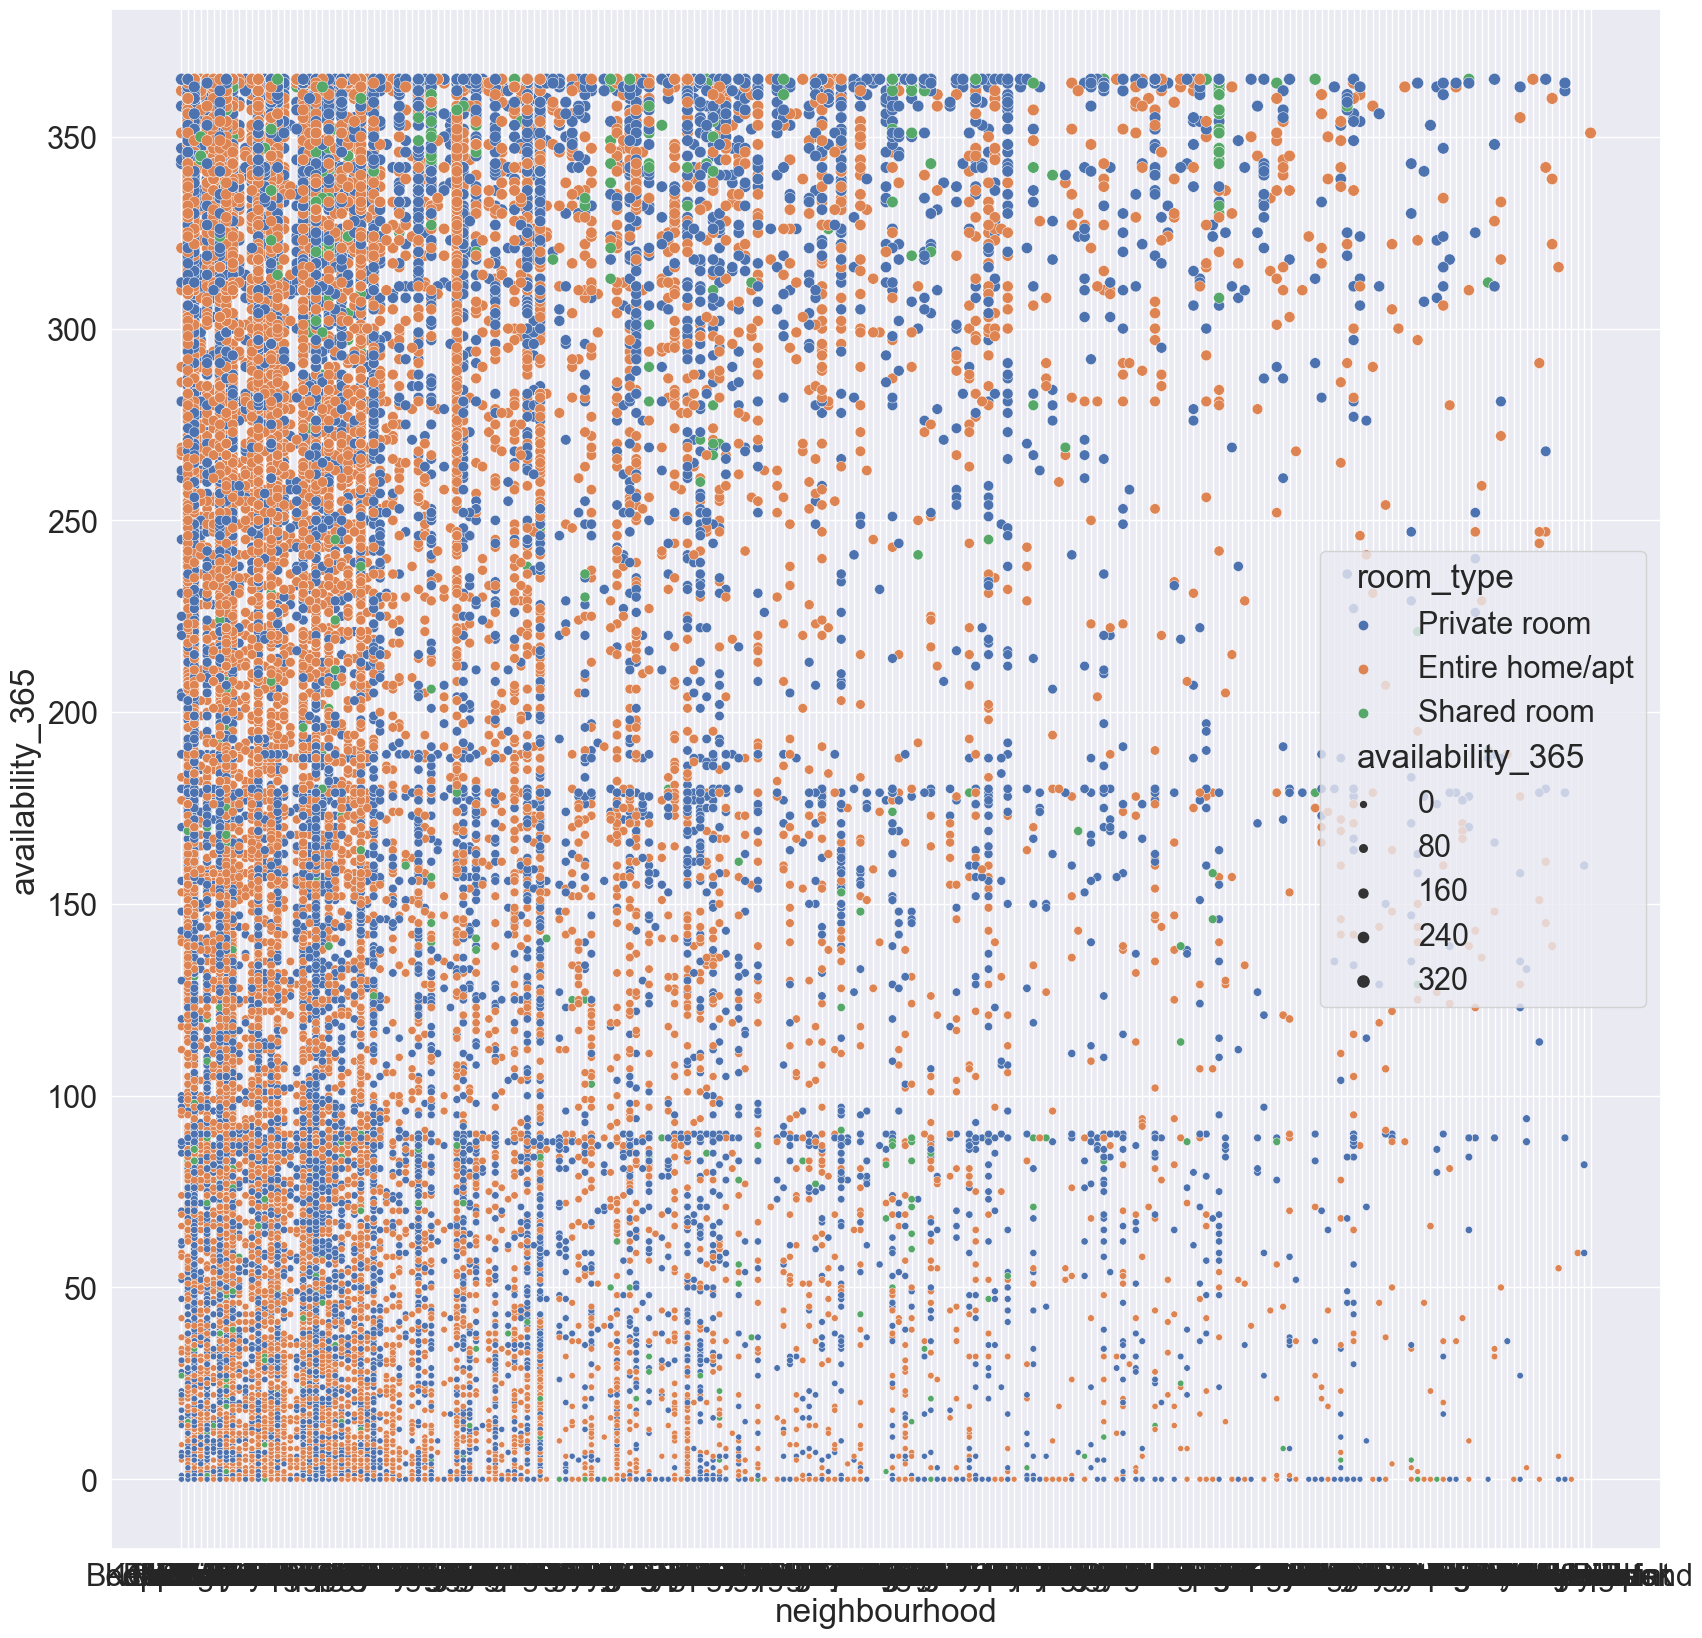

In [16]:
data3 = data[["neighbourhood" ,"availability_365" ,"room_type"]]
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(data=data3, x="neighbourhood", y="availability_365", hue="room_type", size="availability_365", ax=ax)
plt.show()


4. Vẽ bản đồ (scatter plot của neighborhood dựa theo tạo độ lat lon)

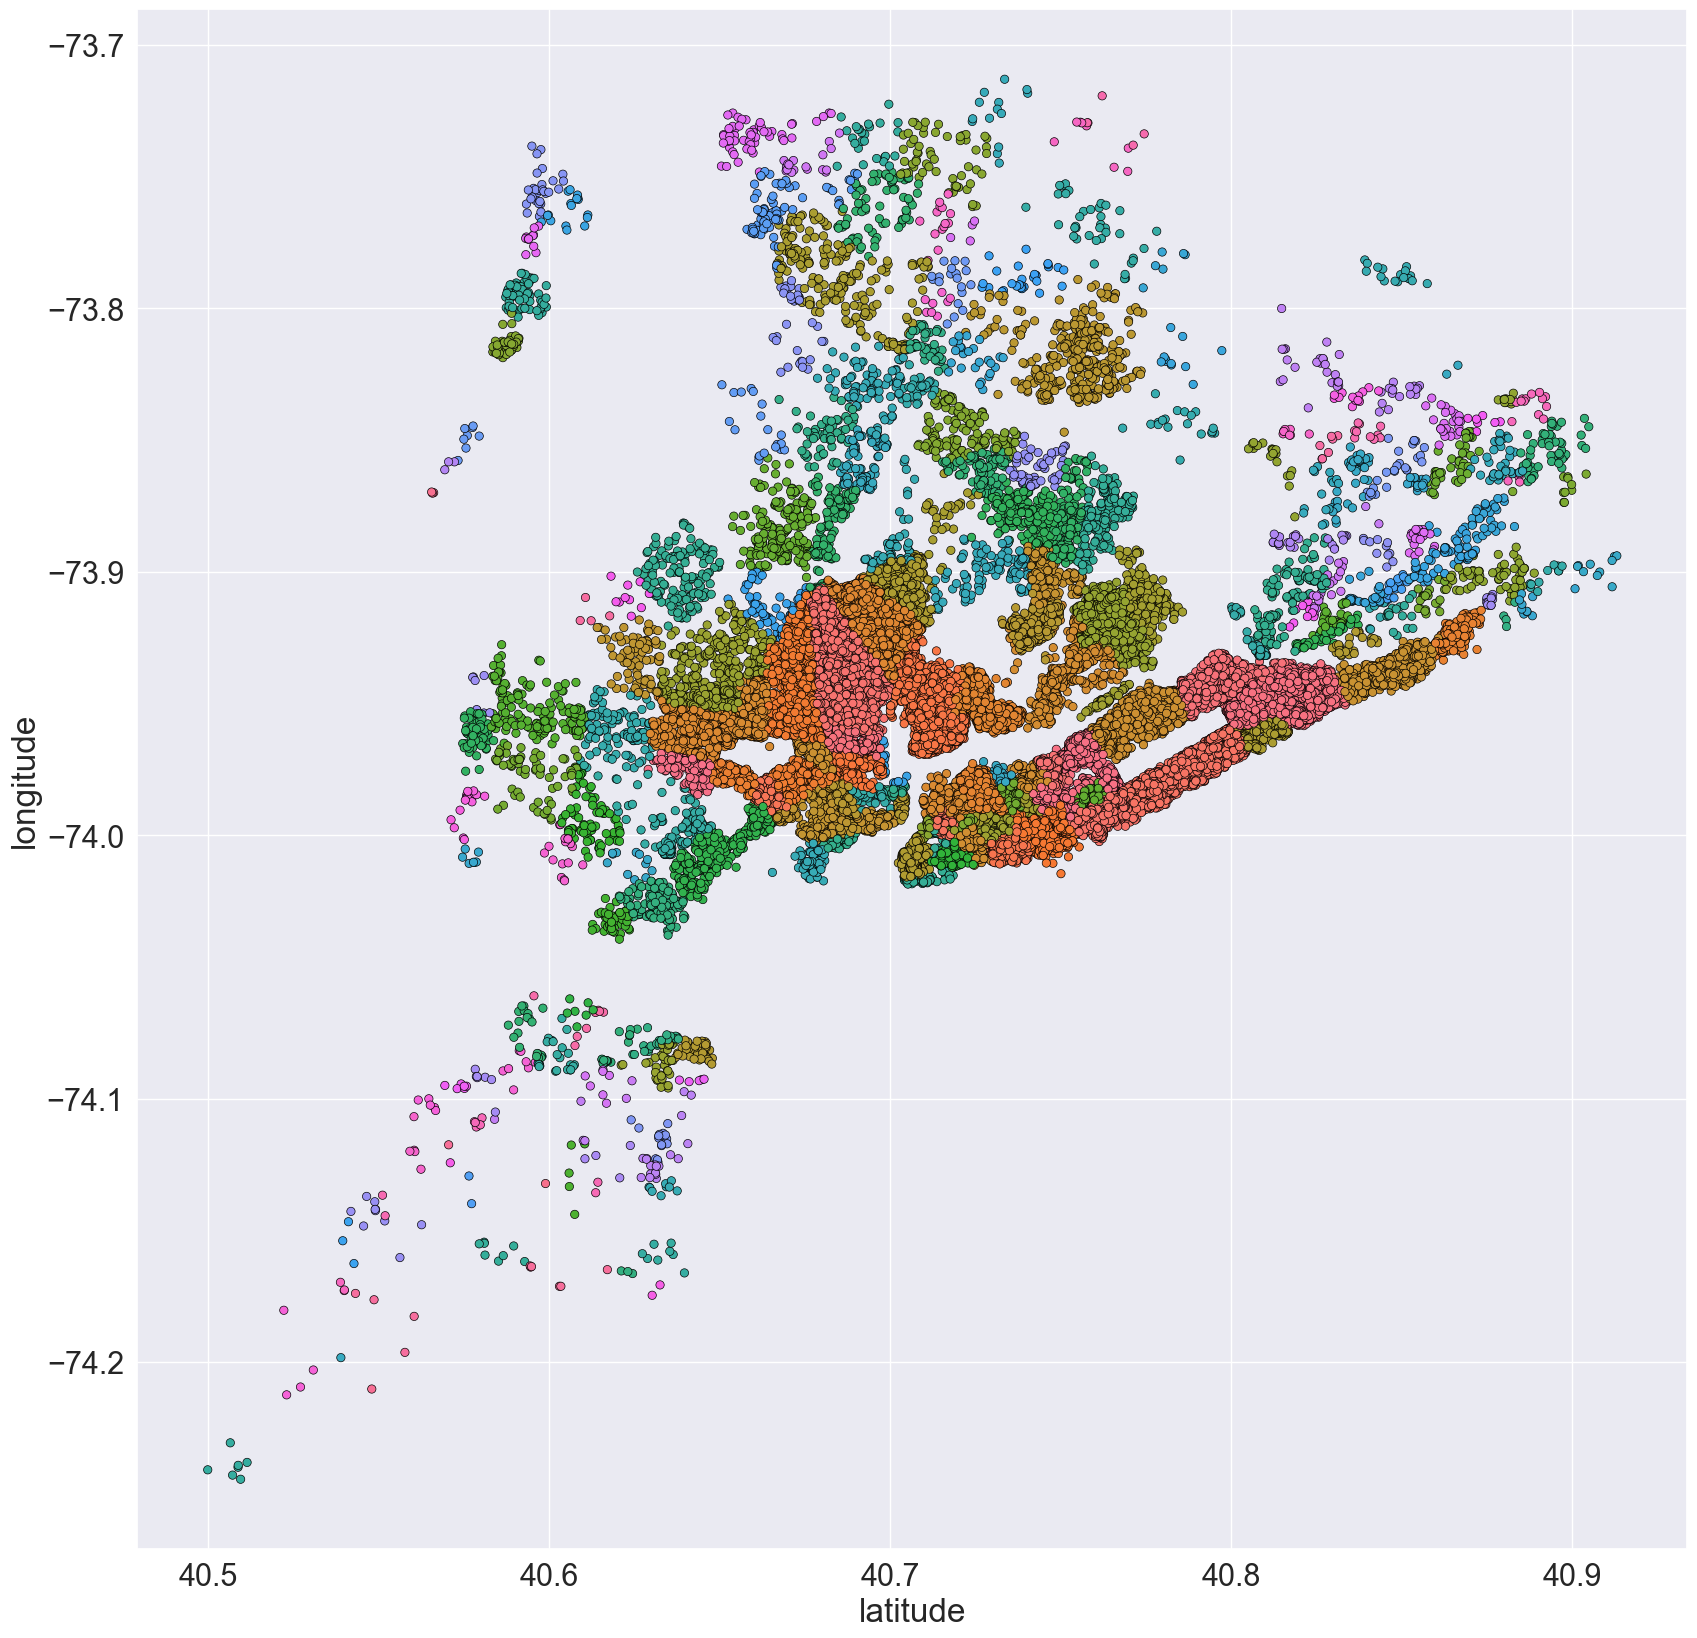

In [23]:
data4 = data[["neighbourhood" ,"latitude" ,"longitude"]]
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(data=data4, x="latitude", y="longitude", hue="neighbourhood", edgecolor="black", legend=False, ax=ax)
plt.show()

5. Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu 

<Figure size 1000x1000 with 0 Axes>

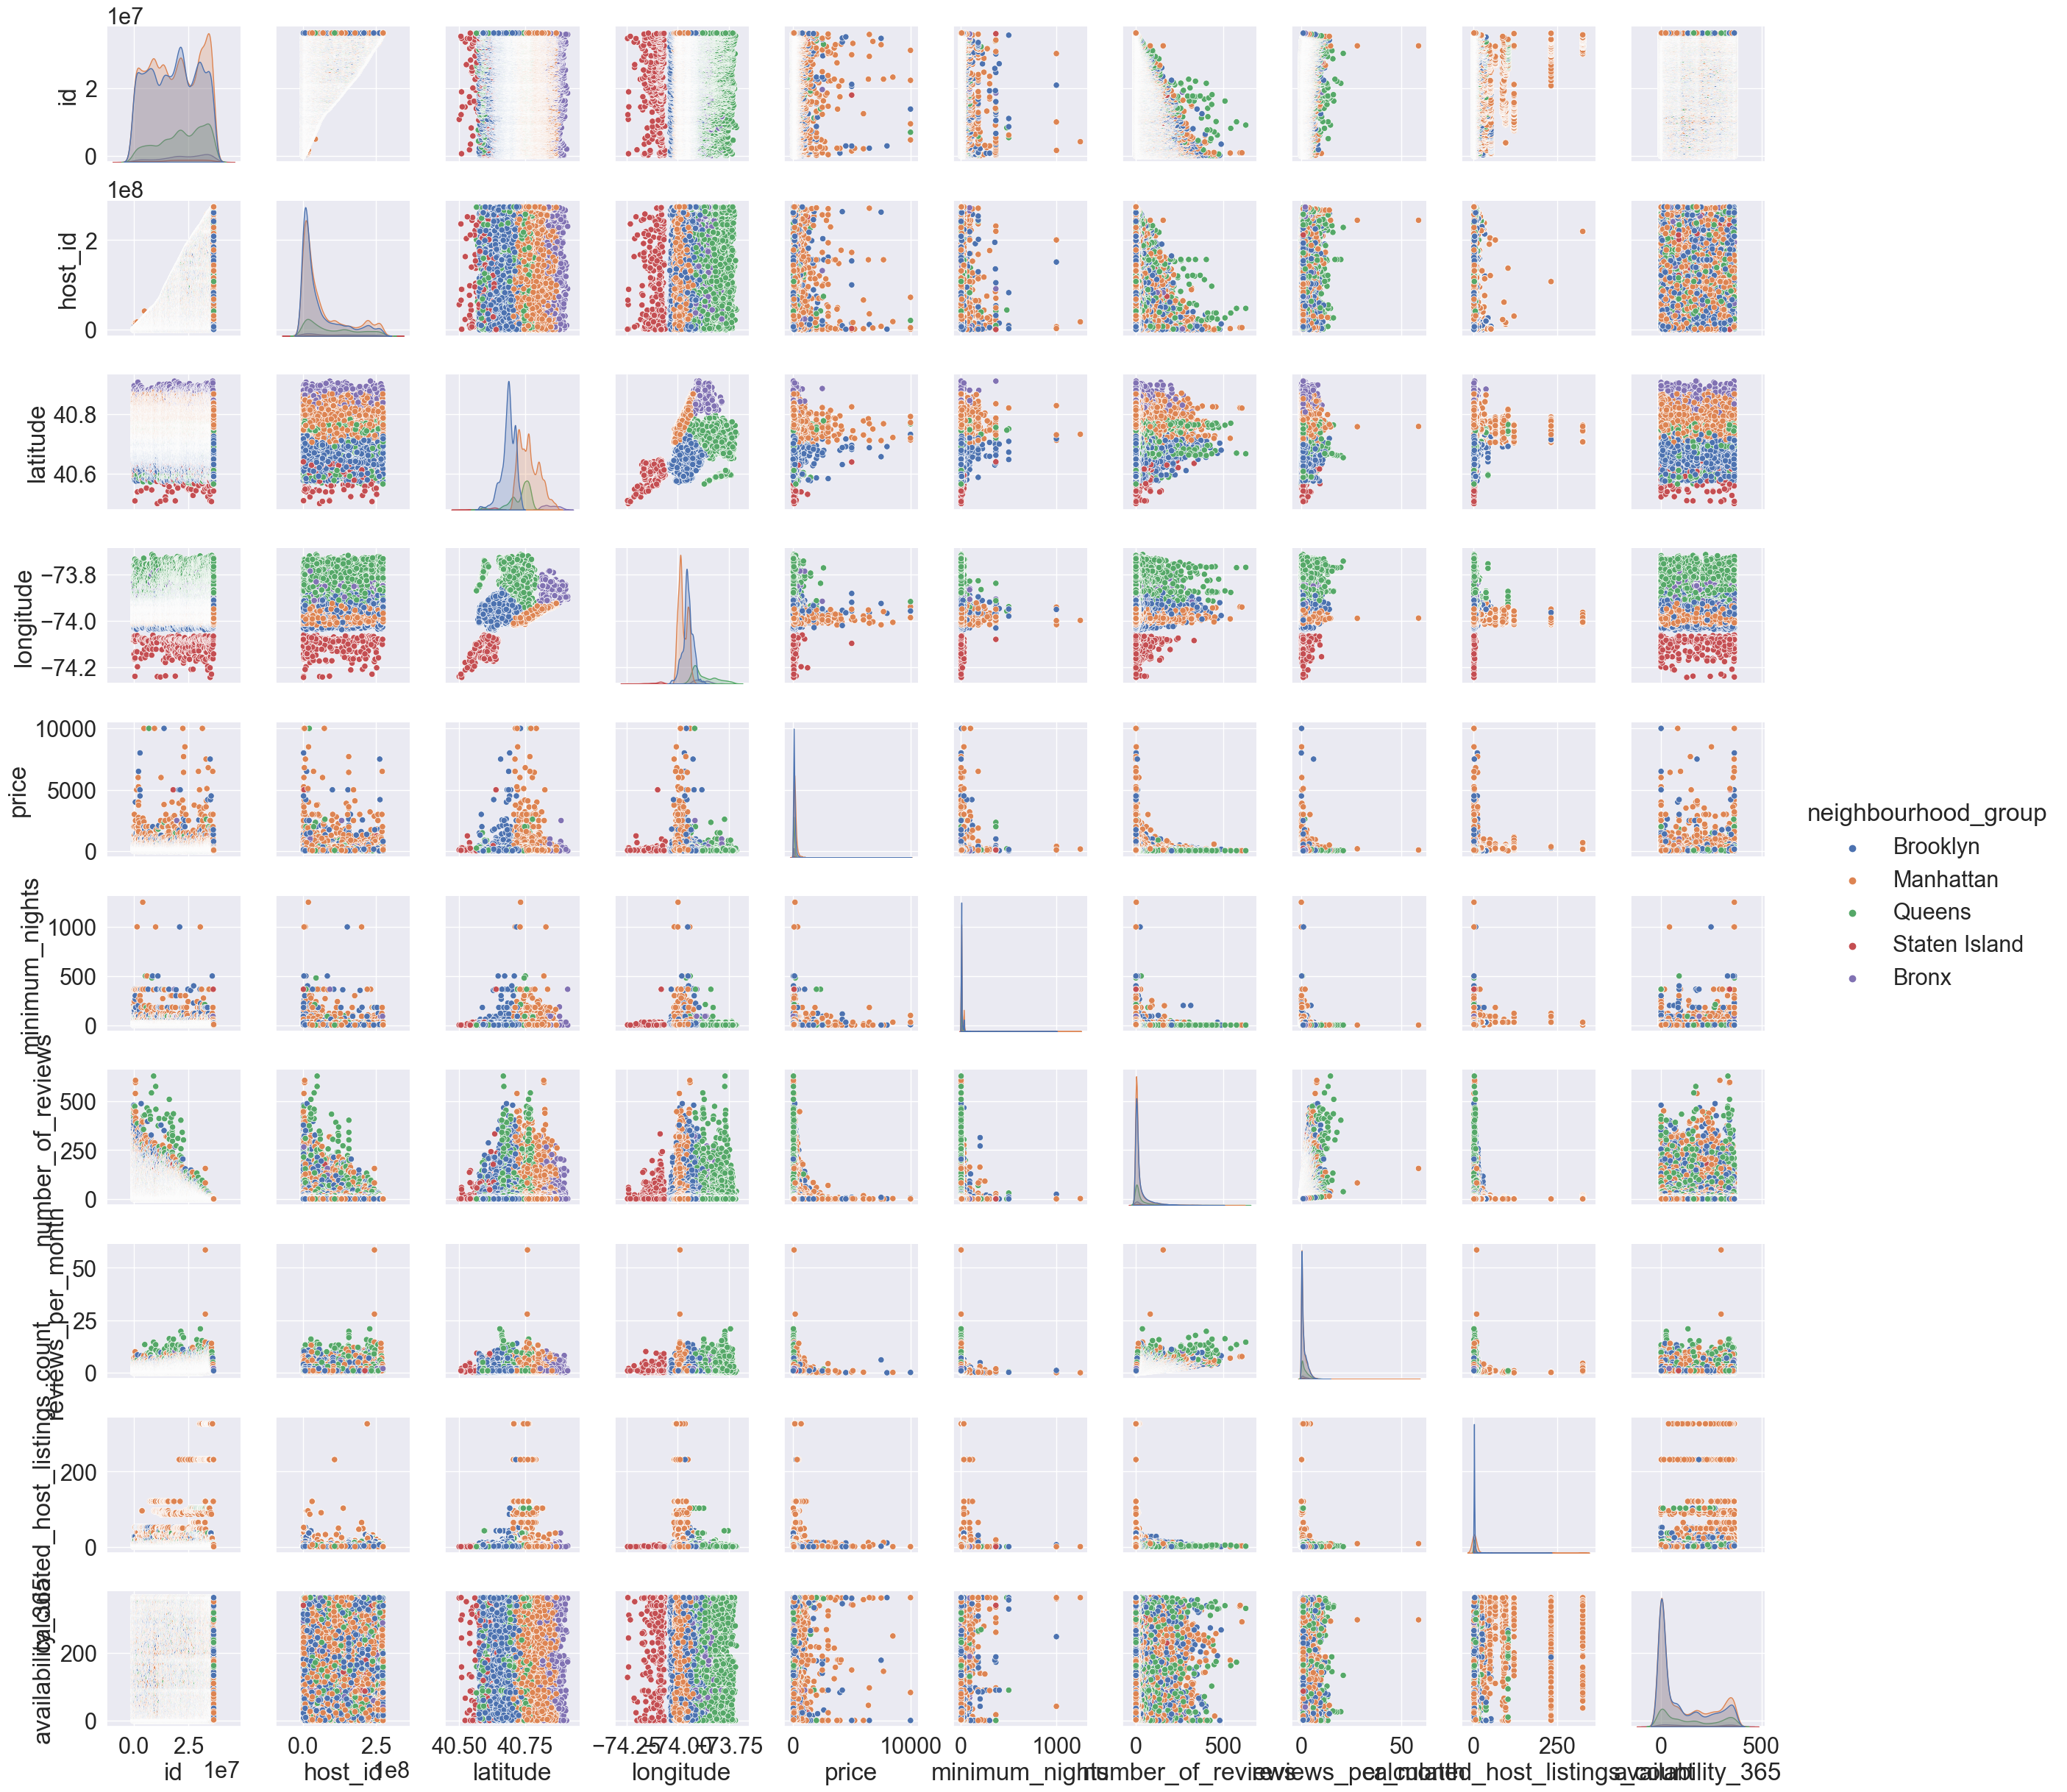

In [24]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='neighbourhood_group')

6. Sử dụng plotly để biểu diễn dữ liệu giá phòng trên bản đồ như mẫu ở slide trang 12

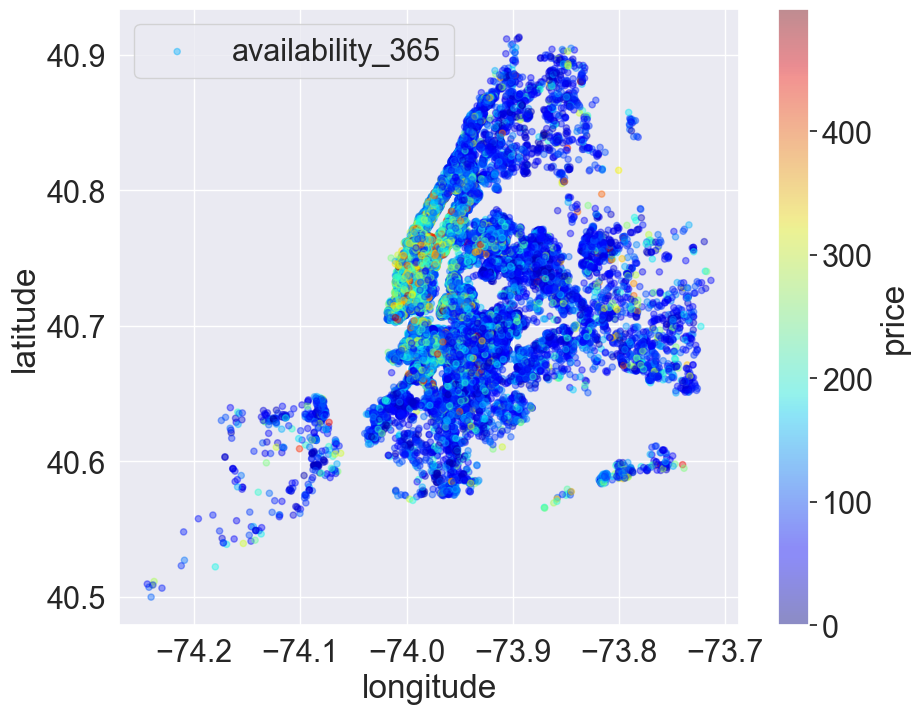

In [29]:
data5=data[data.price < 500]
viz_4=data5.plot.scatter(x='longitude', y='latitude', label='availability_365', c='price', 
                 cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

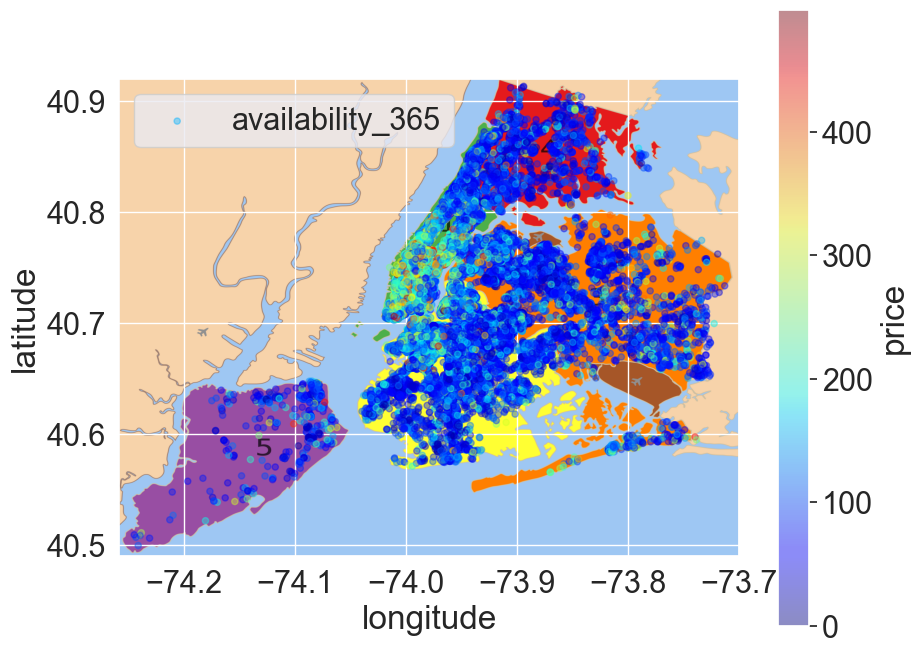

In [35]:
import numpy as np
from PIL import Image
import urllib

# Load the NYC image from URL
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/2000px-5_Boroughs_Labels_New_York_City_Map.svg.png'
with urllib.request.urlopen(url) as url:
    nyc_img = np.array(Image.open(url))

# Plot the image
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Add scatter plot on top of the image
data5.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [54]:
import plotly.express as px
fig = px.scatter(data5, data5["longitude"], data5["latitude"])

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed